In [50]:
import math

import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv("Daten/Jannis_16_06.csv",sep=";")

df['Gaze X'] = df['Gaze X'].astype(int)
df['Gaze Y'] = df['Gaze Y'].astype(int)
df['Timestamp in ms'] = df['Timestamp'] * 1000
df['Timestamp in ms'] = df['Timestamp in ms'].astype(int)
df = df[(df["Gaze Y"] < 1030) == True]
df
#df.to_csv("test_test.csv")
#df["Gaze Y"][1773:2324].mean()

,Index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms
29,29,0.577272,1318,998,NaN,TrackingConfidence.HIGH,577
30,30,0.596290,1318,998,NaN,TrackingConfidence.HIGH,596
31,31,0.616308,1318,998,NaN,TrackingConfidence.HIGH,616
32,32,0.636325,1330,1003,NaN,TrackingConfidence.HIGH,636
33,33,0.655343,1329,1014,NaN,TrackingConfidence.HIGH,655
...,...,...,...,...,...,...,...
15878,15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102
15879,15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122
15880,15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144
15881,15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165


,Index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms
29,29,0.577272,1318,998,NaN,TrackingConfidence.HIGH,577
30,30,0.596290,1318,998,NaN,TrackingConfidence.HIGH,596
31,31,0.616308,1318,998,NaN,TrackingConfidence.HIGH,616
32,32,0.636325,1330,1003,NaN,TrackingConfidence.HIGH,636
33,33,0.655343,1329,1014,NaN,TrackingConfidence.HIGH,655
...,...,...,...,...,...,...,...
15878,15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102
15879,15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122
15880,15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144
15881,15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165


In [186]:
df["Gaze Y"][1773:2324]

1856    367
1857    367
1858    365
1859    365
1860    359
       ... 
2411    553
2412    553
2413    553
2414    555
2415    549
Name: Gaze Y, Length: 551, dtype: int32

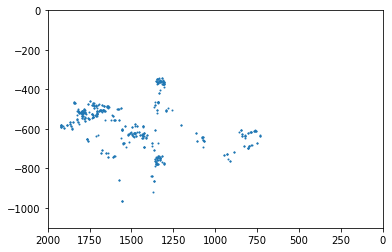

In [197]:
x = df["Gaze X"][8888:9388]
y = df["Gaze Y"][8888:9388] * -1
t = df["Timestamp"].head(100)
plt.axis([2000,0,-1100,0])
plt.scatter(x,y, s = 1)
plt.show()